In [ ]:
from pprint import pprint
a = tower(0,10,0,20)

In [ ]:
pprint(vars(a))

In [ ]:
a = [[0 for y in range(8)] for x in range(8)]

In [ ]:
a[0][1] = 1
a

In [101]:
import random
from copy import copy,deepcopy
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

class tower(object):
    '''Class: Tower
    Param: object of type tower
    Param: Co-ordinates of the Rectangular bounded region
    Description: Generates random co-ordinates for a sequence of rectangles'''
    lb1 = 0
    lb2 = 0
    lu1 = 0
    lu2 = 0
    rb1 = 0
    rb2 = 0
    ru1 = 0
    ru2 = 0
    length = 0
    breadth = 0
    def __init__(self,x1,x2,y1,y2):
        self.lb1 = random.randint(x1,x2)
        self.lb2 = random.randint(y1,y2)
        if self.lb1 == x1 and self.lb2 == y1:
            self.length = random.randint(1,x2)
            self.breadth = random.randint(1,y2)
        else:
            self.length = random.randint(1,x2-self.lb1 + 1)
            self.breadth = random.randint(1,y2-self.lb2 + 1)
        self.lu1 = self.lb1
        self.lu2 = self.lb2 + self.breadth - 1
        self.rb1 = self.lb1 + self.length - 1
        self.rb2 = self.lb2
        self.ru1 = self.rb1
        self.ru2 = self.lu2
def fill(lb1,lb2,lu1,lu2,rb1,rb2,ru1,ru2,bounded_box,n):
    #print(id(bounded_box))
    i = lb2
    j = lb1
    #lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n
    #8 6 10 6 8 19 10 19
    #print bounded_box
    while i <= lu2:
        j = lb1
        while j <= rb1:
            #print j
            #print i
            bounded_box[i][j] = bounded_box[i][j] + n
            j = j + 1 
        i = i + 1
def max_rect(bounded_box,lb1,lb2,rb1,rb2,lu1,lu2,ru1,ru2,sum_bounded_area,num):
    #print id(lb1)
    m = len(bounded_box)
    #print m
    n = len(bounded_box[0])
    #print n
    left_idx = [0 for i in range(n)]
    right_idx = [n for i in range(n)]
    height = [0 for i in range(n)]
    top_idx = [0 for i in range(n)]
    #print right,top
    maxA = 0
    for i in range(m):
        cord_left = 0
        cord_right = n
        cord_top = 0
        for j in range(n):
            if bounded_box[i][j] == num:
                height[j] = height[j] + 1
            else:
                height[j] = 0
                top_idx[j] = i + 1
        for j in range(n):
            if bounded_box[i][j] == num:
                left_idx[j] = max(left_idx[j],cord_left)
            else:
                left_idx[j] = 0
                cord_left = j + 1 
        for j in range(n-1,-1,-1):
            if bounded_box[i][j] == num:
                right_idx[j] = min(right_idx[j],cord_right)
            else:
                right_idx[j] = n
                cord_right = j
        for j in range(n):
            maxA = max(maxA,(right_idx[j]-left_idx[j])*height[j])
            if maxA == (right_idx[j]-left_idx[j])*height[j]:
                lb1_n = left_idx[j]
                lb2_n = top_idx[j]
                lu1_n = left_idx[j]
                lu2_n = top_idx[j] + height[j] - 1
                rb1_n = right_idx[j] - 1
                rb2_n = top_idx[j]
                ru1_n = right_idx[j] - 1
                ru2_n = top_idx[j] + height[j] - 1             
    sum_bounded_area = sum_bounded_area + maxA
    #print maxA,sum_bounded_area
    #print id(lb1)
    lb1 = lb1_n
    lb2 = lb2_n
    rb1 = rb1_n
    rb2 = rb2_n
    lu1 = lu1_n
    lu2 = lu2_n
    ru1 = ru1_n
    ru2 = ru2_n
    #print lb1,id(lb1)
    return lb1,lb2,rb1,rb2,lu1,lu2,ru1,ru2,sum_bounded_area
        
def ad_hoc(length,breadth,n):
    bounded_box = [[0 for y in range(length)] for x in range(breadth)]
    figures = []
    #print(id(bounded_box))
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, length, 1))
    ax.set_yticks(np.arange(0, breadth, 1))
    #ax.add_patch(patches.Rectangle((0,0),2,3,color=(random.random(),random.random(),random.random()),alpha=0.5)) # alpha is transparency
    #ax.add_patch(patches.Rectangle((0,0),2,2,color=(random.random(),random.random(),random.random()),alpha=0.5)) # alpha is transparency
    i = 1
    total_area = length*breadth
    sum_bounded_area = 0 
    while i <= n:
        rect_tower = tower(0,length-1,0,breadth-1)
        #pprint(vars(rect_tower))
        prev_bound = deepcopy(bounded_box)
        fill(rect_tower.lb1,rect_tower.lb2,rect_tower.lu1,rect_tower.lu2,rect_tower.rb1,rect_tower.rb2,rect_tower.ru1,rect_tower.ru2,bounded_box,i)
        #ax.add_patch(patches.Rectangle((1,1),2,2,color=(random.random(),random.random(),random.random()),alpha=0.5)) # alpha is transparency
        #ax.add_patch(patches.Rectangle((0,0),2,3,color=(random.random(),random.random(),random.random()),alpha=0.5)) # alpha is transparency
        figures.append(patches.Rectangle((rect_tower.lb1,rect_tower.lb2),rect_tower.rb1-rect_tower.lb1,rect_tower.lu2-rect_tower.lb1,color=(random.random(),random.random(),random.random()),alpha=0.5))
        #tmp_box = deepcopy(bounded_box)
        #print id(tmp_box)
        #print id(bounded_box)
        #print tmp_box
        #print bounded_box
        for j in bounded_box:
            for k in j:
                if k != i:
                    bounded_box[bounded_box.index(j)][j.index(k)] = 0
        #print bounded_box
        if sum(map(sum,bounded_box)) != 0:
            lb1_n = 0
            lb2_n = 0
            rb1_n = 0
            rb2_n = 0
            lu1_n = 0
            lu2_n = 0
            ru1_n = 0
            ru2_n = 0
            #print id(lb1_n)
            lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n,sum_bounded_area = max_rect(bounded_box,lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n,sum_bounded_area,i)
            #print lb1_n,lb2_n,rb1_n,rb2_n,lu1_n,lu2_n,ru1_n,ru2_n,sum_bounded_area
            fill(lb1_n,lb2_n,lu1_n,lu2_n,rb1_n,rb2_n,ru1_n,ru2_n,prev_bound,i)
        bounded_box = deepcopy(prev_bound)
        #print bounded_box
        #print tmp_box
        i = i + 1
        #print prev_bound
        #print bounded_box
    #print bounded_box
    print(len(figures))
    p = PatchCollection(figures, alpha=0.5,match_original=True)
    ax.add_collection(p)
    plt.grid()
    plt.show()
    return float(sum_bounded_area)


5


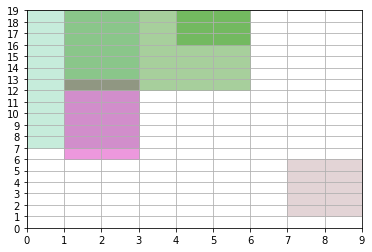

In [102]:
b = ad_hoc(10,20,5)

In [ ]:
def find_avg(iterations):
    b = 0
    n = 1
    sum = 0
    for i in range(iterations):
        n = 1
        #print i
        b = 0
        while b != 1:
            #print b,n
            b = ad_hoc(10,10,n)
            n = n + 1
            #print n
        #print n
        sum = sum + n
    return sum/iterations

In [ ]:
avg = find_avg(10)